# Conjuntos de Julia de polinomios cuadráticos

El propósito de este *notebook* es explorar propiedades básicas de los conjuntos de Julia de polinomios cuadráticos. 

Comenzamos con una definición. Dada $f: \mathbb{C} \rightarrow \mathbb{C}$ tal que $f(z) = z^{2} + c$, donde $c \in \mathbb{C}$, el conjunto de Julia lleno de $f$, escrito como $\mathcal{K}(f)$ se define como el conjunto de números complejos cuya órbita permanece acotada:

$$ \mathcal{K}(f) = \{ z \in \mathbb{C} : \{f^{\circ n}(z)\} \text{  es acotada } \} .$$

Si, por el contrario, la órbita de $z$ no es acotada, decimos que pertenece al conjunto $A_{f}(\infty)$, que reúne todos los puntos que son atraídos hacia el infinito al iterar:

$$ A_{f}(\infty) = \{ z \in \mathbb{C} : \{f^{\circ n}(z)\} \rightarrow \infty \} .$$

Este conjunto es abierto, conexo y no acotado. El conjunto de Julia de $f$, escrito como $\mathcal{J}(f)$ es la frontera común de estos dos conjuntos:

$$ \mathcal{J}(f) = \partial A_{f} (\infty) = \partial \mathcal{K}(f) $$

Si $\text{int} ( \mathcal{K} (f) ) = \varnothing$, entonces $\mathcal{K}(f) = \mathcal{J}(f)$.
En cierto sentido, el conjunto de Julia reúne puntos cuyos entornos, sin importar lo pequeños que sean, exhiben comportamiento caótico al iterar.

Los conjuntos $A_{f}(\infty)$ y $\mathcal{K}(f)$, son complementarios en $\mathbb{C}$. Dado que $A_{f}(\infty)$ no es acotado, podemos deducir que $\mathcal{K}(f)$ es un conjunto acotado. ¿Podemos estimar la región en la que se encuentra $\mathcal{K}(f)$? La respuesta es afirmativa y la provee el Teorema 1, pero antes debemos demostrar dos resultados:

***
**Lema 1.** Para cualesquiera $a, b \in \mathbb{C}$, tenemos que $|a + b| \geq|a| - |b|$.

*Demostración*. $|a| = |a + b - b| \leq |a + b| + |-b| = |a + b| + |b|$. De lo que podemos deducir que $|a+b| \geq |a| - |b|$. 

<div style="text-align: right"> $\square$ </div>

***

***

**Lema 2.** Considérese $f(z) = z^{2} + c$, donde $c$ es cualquier número complejo. Existe un $R \in \mathbb{R}$ tal que si $|z| > R$, entonces $|f(z)| > |z|$.

**Demostración.** Tenemos que $|f(z)| = |z^{2} + c| \geq |z|^{2} - |c|$, en virtud del Lema 1. Si queremos que $|f(z)| > |z|$, podríamos intentar demostrar que $|z|^{2} - |c| > |z|$, es decir, $|z|^{2}  - |z| - |c| > 0$. La expresión del lado izquierdo es un polinomio de grado 2 con raíces en $\mathbb{R}$, la mayor de las cuales está dada por 

$$ R = \frac{1 + \sqrt{1 + 4|c|}}{2}. $$ 

Así, si $|z| > R$, podemos estar seguros que $|z|^{2}  - |z| - |c| > 0$, es decir, $|z|^{2} - |c| > |z|$. De esto se sigue que $|f(z)| > |z|$.

<div style="text-align: right"> $\square$ </div>

***

***
**Teorema 1**. Sea $z$ un número complejo arbitrario. Si existe un $n \in \mathbb{N}$ tal que $|f^{\circ n}(z)| > R$, entonces $ \{f^{\circ n}(z)\} \rightarrow \infty $ de forma que $z \in A_{f}(\infty) $ y $z \notin \mathcal{J}(f)$.


**Demostración**. Supongamos que existe un $n \in \mathbb{N}$ tal que $|f^{\circ n}(z)| > R$. Notemos que cualquier iteración después de $n$ también será mayor que $R$: si $m \geq n$ y $|f^{\circ m}(z)| > R$, entonces $|f^{\circ (m + 1)}(z)|  = |f(f^{\circ m}(z))| > |f^{\circ m}(z)| > R$, en virtud del Lema 2. Así, notamos que la órbita de $z$ bajo $f$ es estrictamente creciente, de manera que $\{ f^{\circ n}(z) \} \rightarrow \infty $ y $z \in A_{f}(\infty)$.
<div style="text-align: right"> $\square$ </div>

***

***
**Corolario.** $\mathcal{K}(f)$ es un conjunto acotado. 

**Demostración**. $\mathcal{K}(f) \subseteq \text{B}(0, R)$, donde $R$ se define como en el Lema 2. 
<div style="text-align: right"> $\square$ </div>
***

La propiedad del Lema 2 puede ser verificada fácilmente por una computadora: si deseamos verificar que $z \in \mathcal{K}(f)$ podemos definir un número máximo de iteraciones $\texttt{maxiter}$ para calcular términos en la órbita $\{ f^{\circ n}(z) \}$. Si en algún momento $f^{\circ n}(z)$ escapa de disco de radio $R$, sabemos que no pertenece al conjunto de Julia lleno. Si, por el contrario, se alcanzó el máximo número de iteraciones y la órbita de $z$ no escapó del disco de radio $R$, entonces $z$ *probablemente* pertenece a $\mathcal{K}(f)$.

### Dependencias

In [14]:
from matplotlib.pyplot import figure, axis, imshow
import numpy as np
from math import sqrt
from numba import autojit
from timeit import default_timer

Definimos una función $\texttt{julia}$ que devuelve número de iteraciones antes que la órbita de un número $\texttt{z}$ escape del disco de radio $\texttt{r}$. 

In [6]:
"""
Dado un número complejo z, el parámetro c, el número máximo de iteraciones maxiter
y el radio en el que se encuentra K(f), esta función devuelve el número de iteraciones
que en la órbita de z0 que se encuentran dentro del disco de radio r.
"""
@autojit
def julia(z, c, maxiter, r):
    for n in range(maxiter):
        if abs(z) > r:
            break;
        else:
            z = z**2 + c
    return n        

La función $\texttt{drawJuliaSet}$ calcula, para cada pixel de la matriz $\texttt{image}$ el número complejo correspondiente e invoca $\texttt{julia}$ sobre cada uno de estos números. El valor que devuelve $\texttt{julia}$ se utiliza para asignar un color a cada pixel. Finalmente, la matriz $\texttt{image}$ se grafica.

In [11]:
@autojit                
def drawJuliaSet(c, maxiter):  
    r = (1 + sqrt(1 + 4*abs(c)))/2 # Radio del Lema 2
    
    xvalues = np.linspace(-r, r, 1000).astype(np.float32) 
    yvalues = np.linspace(-r, r, 1000).astype(np.float32)

    height = len(xvalues)
    width = len(yvalues)
    
    image = np.zeros((height, width), dtype = np.uint8) # Matriz de 0s y dimensión height x width
    
    for x in range(height):
        for y in range(width):
        
            re = xvalues[x]
            im = yvalues[y]
        
            image[x, y] = julia(complex(re, im), c, maxiter, r)
    
    figure(figsize=(10,10))
    axis('off')
    imshow(image, interpolation = "lanczos")

### $\mathcal{K}(z^{2} + i)$

Creado en 0.200509 s


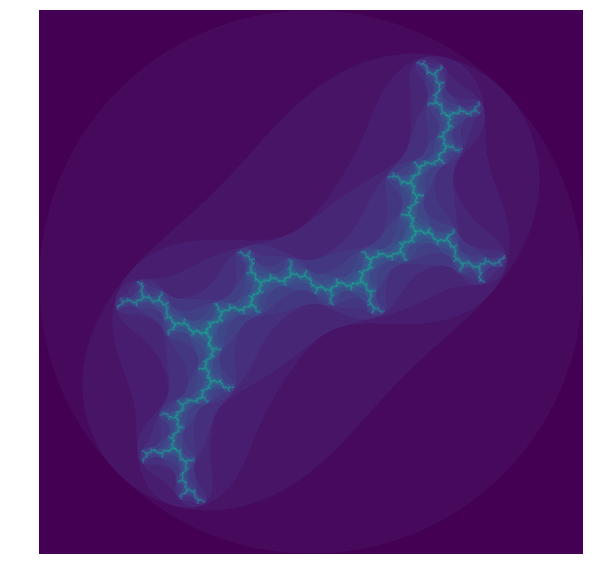

In [20]:
start = default_timer()
drawJuliaSet(complex(0, 1), 1000)
dt = default_timer() - start
 
print("Creado en %f s" % dt)

### Plotting

In [ ]:
def mandelbrot(c, maxiter):
    z = complex(0, 0)
    
    for n in range(maxiter):
        z = z*z + c
        
        if abs(z) > 4:
            break
            pass
        
        pass
    
    return n

In [ ]:
xvalues = linspace(-2.25, 0.75, 1500)
yvalues = linspace(-1.5, 1.5, 1500)

xlen = len(xvalues)
ylen= len(yvalues)

atlas = empty((xlen, ylen))

for ix in range(xlen):
    for iy in range(ylen):
        
        cx = xvalues[ix]
        cy = yvalues[iy]
        c = complex(cx, cy)
        
        atlas[ix, iy] = mandelbrot(c, 500)

In [ ]:
figure(figsize=(10,10))
axis('off')
imshow(atlas.T, interpolation="lanczos")

In [ ]:
import numpy as np

def julia_set(c, xn, yn, maxiter, radius):
    X = np.linspace(-radius, radius, xn).astype(np.float32)
    Y = np.linspace(-radius, radius, yn).astype(np.float32)
    
    #we now form the matrix of complex numbers representing the plane
    Z = X + Y[:, None]*1j
    
    #We prepare the matrix in which we'll keep the number of iterations
    N = np.zeros_like(Z, dtype = int)
    
    for n in range(maxiter):
        #Get those numbers which are outside the disk
        I = np.less(abs(Z), radius)
        
        #Mark the orbit for those numbers
        N[I] = n
        
        Z[I] = Z[I]**2 + c    
    return Z, N    

import time
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
from math import sqrt

c = -0.74543 + 0.11301j

R = (1 + sqrt(1 + 4*abs(c)))/2
Z, N = julia_set(c, 1750, 1750, 200, R)

log_horizon = np.log(np.log(R))/np.log(2)

with np.errstate(invalid='ignore'):
        M = np.nan_to_num(N + 1 - np.log(np.log(abs(Z)))/np.log(2) + log_horizon)

dpi = 72
width = 10
height = 10
fig = plt.figure(figsize=(width, height), dpi=dpi)
ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False, aspect=1)

# Shaded rendering
light = colors.LightSource(azdeg=315, altdeg=10)
M = light.shade(M, cmap=plt.cm.hot, vert_exag=1.5, norm=colors.PowerNorm(0.3), blend_mode='hsv')
plt.imshow(M, extent=[-R, R, -R, R], interpolation="bicubic")
ax.set_xticks([])
ax.set_yticks([])

# Some advertisement for matplotlib
year = time.strftime("%Y")
text = ("The Mandelbrot fractal set\n" "Rendered with matplotlib %s, %s - http://matplotlib.org"% (matplotlib.__version__, year))
ax.text(-R +.025, -R +.025, text, color="white", fontsize=12, alpha=0.5)

plt.show()
    

In [ ]:
x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)

from matplotlib.pyplot import imshow

imshow(x + y[:, None], interpolation="nearest")